In [5]:
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# print(X_train[:5][0])

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Scaling the data in [0, 1] range
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshaping the data to 2D arrays
X_train = X_train.reshape(len(X_train), -1) # 60000 x (28*28)
X_test = X_test.reshape(len(X_test), -1) # 10000 x (28*28)

Accuracy: 87.64%
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.77      0.81      0.79      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.77      0.82      0.79      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.71      0.58      0.64      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000

Confusion Matrix:


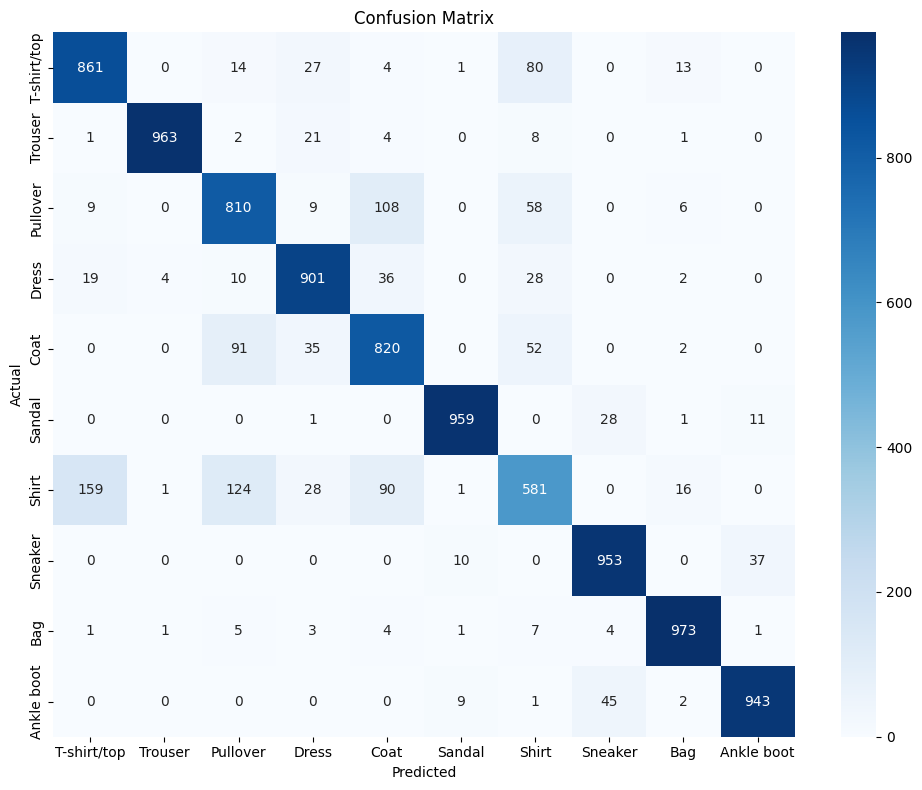

In [7]:
# Use this for faster training
# X_train = X_train[:20000]
# y_train = y_train[:20000]

model = RandomForestClassifier(random_state=42, n_jobs= -1)

model.fit(X_train, y_train)
joblib.dump(model, "./models/random_forest_model.joblib")

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))
print("Confusion Matrix:")
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues",
           xticklabels=class_names,
           yticklabels=class_names)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

The Random Forest classifier achieved 87.64% accuracy, performing better than Logistic Regression due to its ability to model non-linear relationships in the image data. Unlike Logistic Regression, which treats pixel intensities as a linear combination, Random Forests use multiple decision trees to capture more complex patterns across the 784-dimensional features. However, since the model still works on flattened pixel vectors and does not learn spatial structure like edges or shapes, its performance plateaus below deep-learning approaches. This makes it a stronger baseline than Logistic Regression but still noticeably weaker than a CNN.